In [1]:
# 导入数据集
from sklearn.datasets import fetch_california_housing
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
# 导入数据集
data = fetch_california_housing()
X_california = data.data
y_california = data.target
feature_names = data.feature_names

# 输出数据集信息
print("数据集大小:", X_california.shape)
print("特征数量:", len(feature_names))
print("特征名称:", feature_names)
print("标签分布情况:\n", data.target)

plt.rcParams['font.family'] = 'SimHei'      # 中文正常显示
plt.rcParams['axes.unicode_minus'] = False  # 符号正常显示


数据集大小: (20640, 8)
特征数量: 8
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
标签分布情况:
 [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [2]:
# 模型建立：使用 GradientBoostingRegressor 建立分类模型
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

model = GradientBoostingRegressor()
# 输出：模型评分（使用交叉验证得到模型的综合评分）
# cv = KFold(n_splits=10, shuffle=True, random_state=1111) 
# cv=KFold(n_splits=10, shuffle=True, random_state=1111)：这里使用了 KFold 类，将数据集划分为 10 个折叠（folds），即将数据分成 10 份。
# shuffle=True 表示在划分之前对数据进行随机洗牌，random_state=1111 是随机数种子，确保每次划分的结果相同
# 两者的功能相似，都将数据集分为 10 个部分，但 KFold 提供了更多的灵活性。通过设置 shuffle=True 和 random_state 参数，可以控制数据集的洗牌和重复性
# cv=10 则只是简单将数据集等分为 10 份，没有进一步的配置选项

scores = cross_val_score(model, X_california, y_california, cv=KFold(n_splits=10, shuffle=True, random_state=1111),n_jobs=-1)
print("模型评分:", scores)
print("模型评分均值:", scores.mean())



模型评分: [0.77397196 0.79857932 0.78228643 0.77032909 0.79961033 0.78601253
 0.79187258 0.7898419  0.80107516 0.78987064]
模型评分均值: 0.7883449939412043


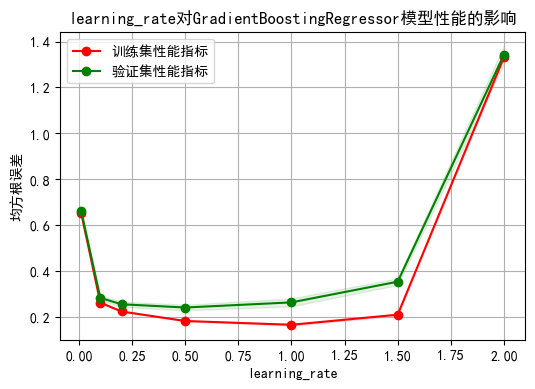

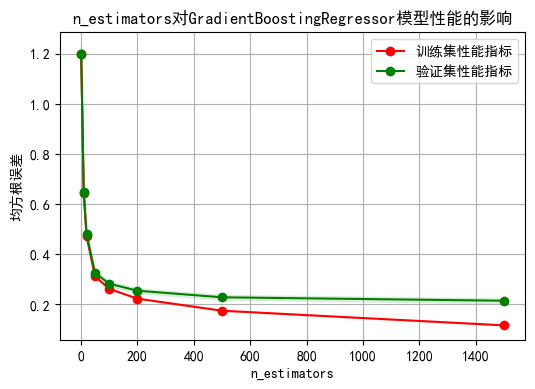

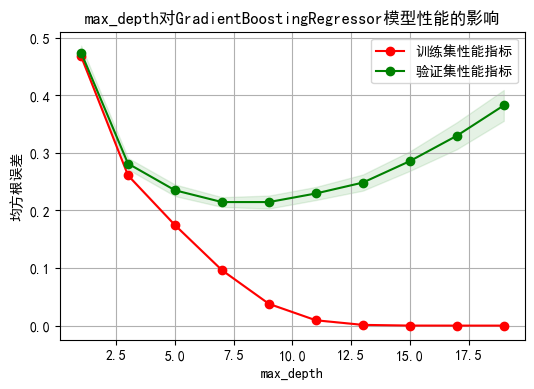

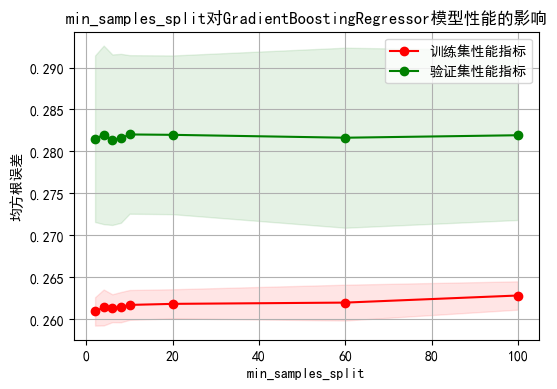

In [3]:
# 考虑调整GradientBoostingRegressor模型中的几个超参数：
# n_estimators：基学习器的数量
# learning_rate：学习率
# max_depth：基学习器的最大深度
# min_samples_split：内部节点再划分所需最小样本数
# min_samples_leaf：叶子节点最少样本数


# 定义超参数范围
# param_range = [0.01, 0.1, 0.5, 1.0]

def roughly_show(param_name,param_range):
    # 使用validation_curve函数计算学习曲线，该函数会在不同超参数值上拟合模型，并在训练集和验证集上计算性能指标（这里使用均方根误差）。
    # param_name是要调优的超参数名称，这里是learning_rate。param_range是超参数的范围
    # scoring指定了使用的性能指标，这里是负均方根误差
    train_scores, valid_scores = validation_curve(
        GradientBoostingRegressor(),  # 使用GradientBoostingRegressor模型
        X_california, y_california,  # 数据集
        param_name=param_name,  # 要调优的超参数名称
        param_range=param_range,  # 超参数范围
        cv=KFold(n_splits=10, shuffle=True, random_state=1111),  # 交叉验证策略
        scoring="neg_mean_squared_error",  # 使用均方根误差作为性能指标
        n_jobs=-1  # 并行运行
    )

    # 计算性能指标的均值和标准差
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    valid_scores_mean = -valid_scores.mean(axis=1)
    valid_scores_std = valid_scores.std(axis=1)

    # 绘制学习曲线
    plt.figure(figsize=(6, 4))
    plt.title(param_name+"对GradientBoostingRegressor模型性能的影响")
    plt.xlabel(param_name)
    plt.ylabel("均方根误差")   # 均方根误差MSE
    plt.grid()

    # rfill_between函数绘制训练集和验证集性能指标的均值和标准差的范围，以可视化性能的稳定性
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")    
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                    valid_scores_mean + valid_scores_std, alpha=0.1, color="g")

    # 使用plot函数绘制训练集和验证集的性能指标随超参数值变化的曲线
    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="训练集性能指标")   # 训练集的性能指标
    plt.plot(param_range, valid_scores_mean, 'o-', color="g", label="验证集性能指标") # 验证集的性能指标

    plt.legend(loc="best")
    plt.show()


roughly_show("learning_rate",[0.01, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0])
roughly_show("n_estimators",[1, 10, 20, 50, 100, 200, 500, 1500])
roughly_show("max_depth",[ 1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
roughly_show("min_samples_split",[2, 4, 6, 8, 10, 20, 60, 100])
# roughly_show("n_estimators",[None, 1, 2, 5, 10, 15, 20])




In [4]:
# 由上图可视化图片，可以看出：
# 1、学习率对模型性能的影响非常大

# 接下来可利用以上信息做更细致的RandomizedSearchCV调参

# 定义超参数范围
param_dist = {
    "n_estimators": [500, 1000, 1500],
    "learning_rate": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
    "max_depth": [7, 9, 11, 13, 15]
}

# 使用RandomizedSearchCV函数进行随机搜索，搜索超参数的组合
# n_iter指定了搜索的次数，cv指定了交叉验证策略，n_jobs指定了并行运行的任务数
# scoring指定了使用的性能指标，这里是负均方根误差
# random_state指定了随机种子，这里是1111
# verbose指定了搜索过程的详细程度，这里是2，表示打印出每次搜索的结果
search = RandomizedSearchCV(
    GradientBoostingRegressor(),  # 使用GradientBoostingRegressor模型
    param_distributions=param_dist,  # 超参数范围
    n_iter=10,  # 搜索次数，也就是不同的超参数组合的个数
    cv=KFold(n_splits=10, shuffle=True, random_state=1111),  # 交叉验证策略
    scoring="neg_mean_squared_error",  # 使用均方根误差作为性能指标
    n_jobs=-1,  # 并行运行
    random_state=1111 # 随机种子
)

# 使用随机搜索训练模型
search.fit(X_california, y_california)

# 打印出最佳模型的超参数组合
# print("最佳参数组合 ",search.best_params_)
print("最佳参数组合 ",search.best_estimator_)

# 打印出最佳模型的性能指标
print(-search.best_score_)



最佳参数组合  GradientBoostingRegressor(learning_rate=0.3, max_depth=11, n_estimators=500)
0.24994615122268748


               Model  Training Time (s)     Train MSE  Test MSE  Train R2  \
0  Gradient Boosting          55.416790  3.126288e-08  0.245932  1.000000   
1      Random Forest           6.177680  1.711999e-01  0.296493  0.871931   
2           AdaBoost           0.168005  9.541967e-01  0.963996  0.286197   

    Test R2  
0  0.812324  
1  0.773740  
2  0.264355  


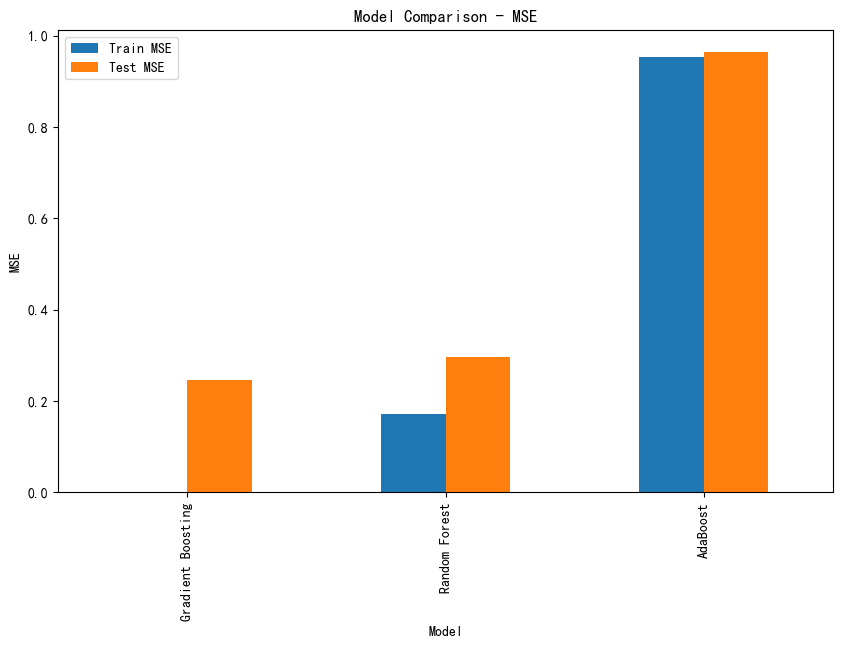

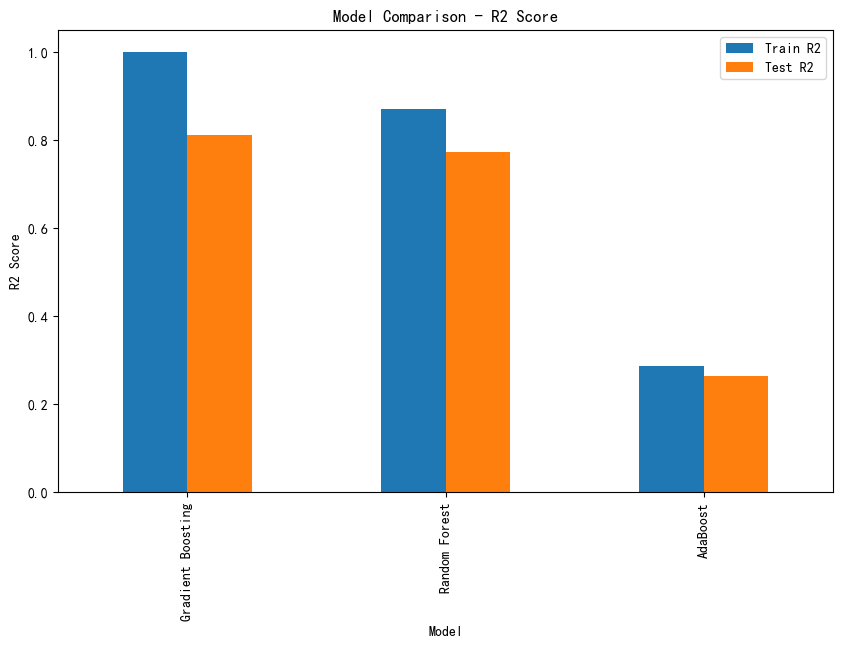

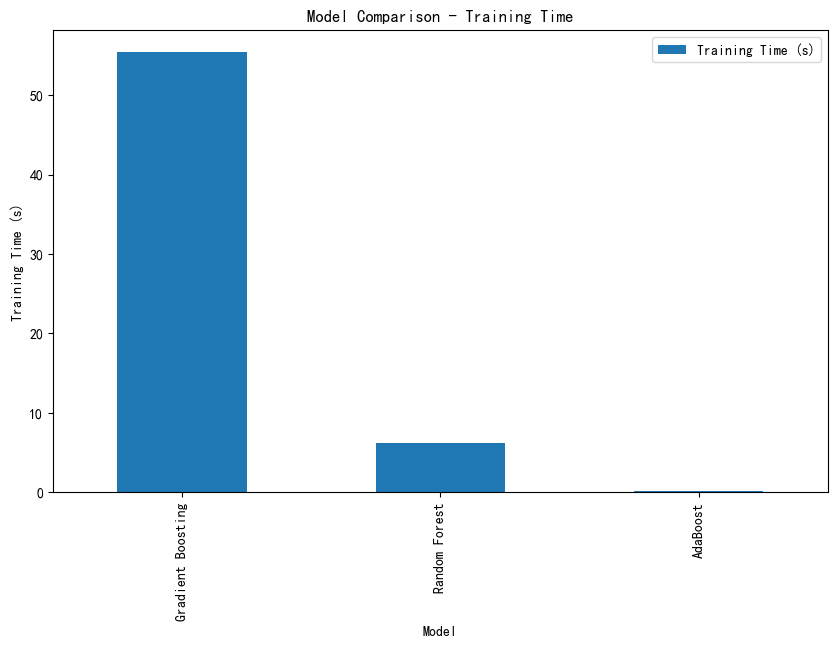

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt

# 加载加利福尼亚房价数据集
california = fetch_california_housing()
X, y = california.data, california.target

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义模型及其超参数
models = {
    'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.3, max_depth=11, n_estimators=500),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'AdaBoost': AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1), n_estimators=50, random_state=42)
}

# 比较模型的建模时间和预测效果
results = []

for name, model in models.items():
    # 记录建模时间
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # 预测
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # 计算均方误差和R2得分
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    # 记录结果
    results.append({
        'Model': name,
        'Training Time (s)': end_time - start_time,
        'Train MSE': mse_train,
        'Test MSE': mse_test,
        'Train R2': r2_train,
        'Test R2': r2_test
    })

# 打印比较结果
results_df = pd.DataFrame(results)
print(results_df)

# 可视化比较结果

# MSE比较
results_df.set_index('Model')[['Train MSE', 'Test MSE']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - MSE')
plt.ylabel('MSE')
plt.show()

# R2得分比较
results_df.set_index('Model')[['Train R2', 'Test R2']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.show()

# 训练时间比较
results_df.set_index('Model')[['Training Time (s)']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Training Time')
plt.ylabel('Training Time (s)')
plt.show()
